In [1]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv("laptop_price.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 12)

In [5]:
df.rename(columns = {'Unnamed: 0':'id'}, inplace = True)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

id                  0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
# drop the id column
df = df.drop("id",axis=1)

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [11]:
# remove the GB part
df['Ram']=df['Ram'].str.replace("GB","")

In [12]:
df['Weight'] = df['Weight'].str.replace("kg","")

In [13]:
df['Ram']=df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype("float32")

In [14]:
# univariate analysis on price column
import seaborn as sns


C:\Users\Admin\Umang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

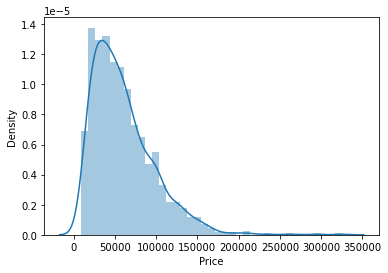

In [15]:
sns.distplot(df['Price'])

In [16]:
# the data is left skewd which is obvisous in real world scenario

<AxesSubplot:>

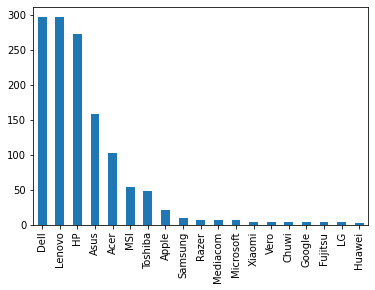

In [17]:
# now Company column
df['Company'].value_counts().plot(kind='bar')


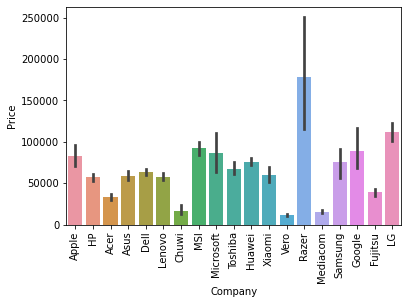

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

<AxesSubplot:>

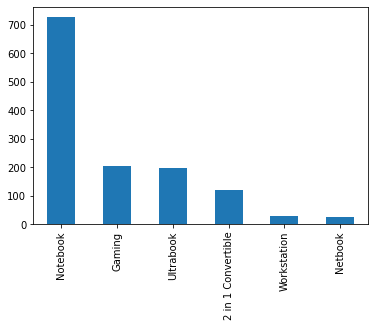

In [19]:
# now new column type_name
df['TypeName'].value_counts().plot(kind='bar')

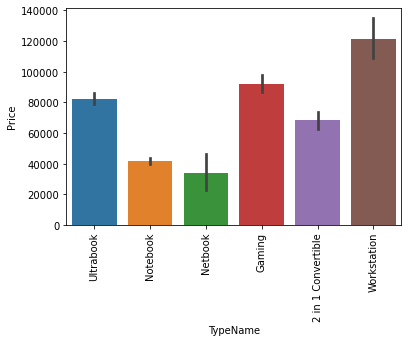

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation ='vertical')
plt.show()

C:\Users\Admin\Umang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

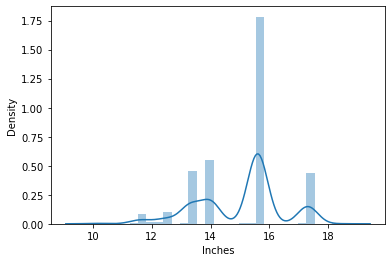

In [21]:
# next column size
sns.distplot(df['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

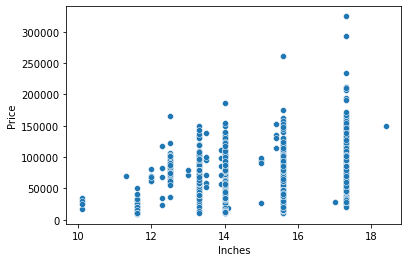

In [22]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [23]:
df.corr()

,Inches,Ram,Weight,Price
Inches,1.000000,0.237993,0.827631,0.068197
Ram,0.237993,1.000000,0.383874,0.743007
Weight,0.827631,0.383874,1.000000,0.210370
Price,0.068197,0.743007,0.210370,1.000000


In [24]:
# Now screen Resolution which is difficault

In [25]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [26]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)

In [27]:
df.sample(4)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
314,Asus,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,14652.00,1
349,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 530,Windows 10,1.90,35324.64,0
99,HP,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.62,66546.72,0
962,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.52,0


<AxesSubplot:>

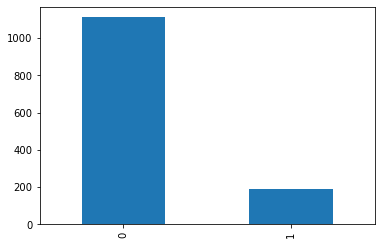

In [28]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

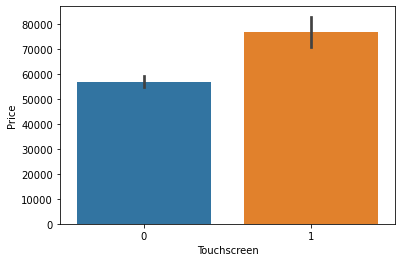

In [29]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [30]:
df['Ips']=df['ScreenResolution'].apply(lambda x : 1 if 'IPS' in x else 0)

<AxesSubplot:xlabel='Ips', ylabel='Price'>

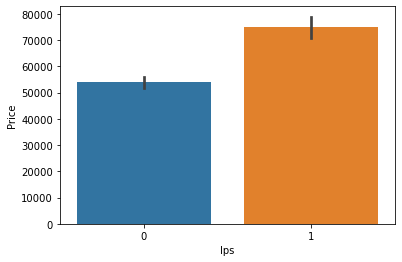

In [31]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [32]:
 new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [34]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [35]:
df['X_res']=df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [37]:
# the datatype is object so we have to change
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [39]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [40]:
# create new column from the X_res ,Y_res and Inches which is calles ppi
df['ppi']=(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [41]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [42]:
df.drop(columns=['ScreenResolution'],inplace =True)

In [43]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [44]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [45]:
# define new five columns form the Cpu columns 
# 1) core i5
# 2) core i3 and core i7 and one for amd processors 
df['Cpu Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df['Cpu Name']

0            Intel Core i5
1            Intel Core i5
2            Intel Core i5
3            Intel Core i7
4            Intel Core i5
               ...        
1298         Intel Core i7
1299         Intel Core i7
1300    Intel Celeron Dual
1301         Intel Core i7
1302    Intel Celeron Dual
Name: Cpu Name, Length: 1303, dtype: object

In [47]:
def fetch_processor(text):
    if text =='Intel Core i5' or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        
        if(text.split()[0]== 'Intel'):
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [48]:
df['Cpu Brand'] = df['Cpu Name'].apply(fetch_processor)

In [49]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu Brand
1207,Lenovo,Notebook,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.20,15930.7200,0,0,100.454670,AMD E-Series 9000,AMD Processor
1267,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7,Intel Core i7
313,Acer,Notebook,AMD A8-Series 7410 2.2GHz,8,256GB SSD,AMD Radeon R5,Windows 10,2.23,24988.3200,0,0,141.211998,AMD A8-Series 7410,AMD Processor
988,Dell,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.7200,0,0,100.454670,Intel Core i7,Intel Core i7
524,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Linux,2.80,47365.9200,0,1,127.335675,Intel Core i5,Intel Core i5


<AxesSubplot:>

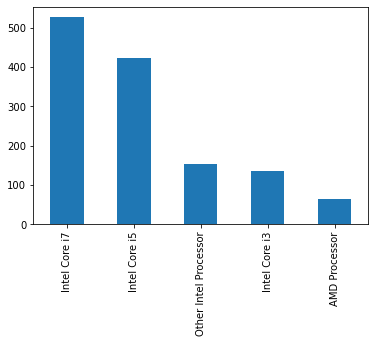

In [50]:
df['Cpu Brand'].value_counts().plot(kind='bar')

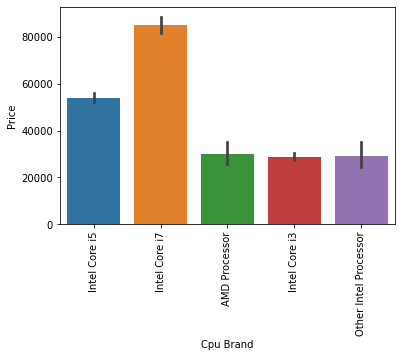

In [51]:
sns.barplot(x=df['Cpu Brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

<AxesSubplot:>

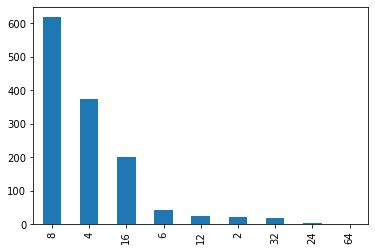

In [53]:
# now lets talk about ram
df['Ram'].value_counts().plot(kind='bar')


<AxesSubplot:xlabel='Ram', ylabel='Price'>

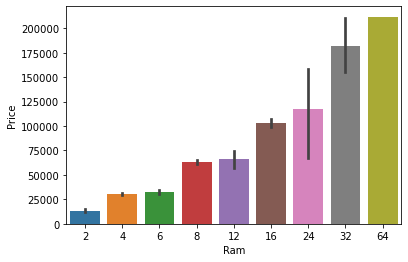

In [54]:
# it has linear relation with price column which is very important
sns.barplot(x=df['Ram'], y =df['Price'])

In [55]:
# now lets take look at memory column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
# we are going to make the 4 different columns out of this
# 1) HDD
# 2) SSD
# 3) Flash drive
# 4) Hybridabs

df['Memory'] = df['Memory'].astype(str).replace('\.0','')
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')


In [57]:
new= df['Memory'].str.split("+",n=1,expand =True)

In [58]:
new[0]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: 0, Length: 1303, dtype: object

In [59]:
df['first'] = new[0]
df['first']=df['first'].str.strip()

In [60]:
df['second'] = new[1]

In [61]:
# make columns with if contains HDD,SSD makes 1 and 0
df['HDD1'] = df['first'].apply(lambda x : 1 if "HDD" in x else 0)
df['SSD1'] = df['first'].apply(lambda x : 1 if "SSD" in x else 0)
df['HYBRID1'] = df['first'].apply(lambda x : 1 if "Hybrid" in x else 0)
df['FLASH1'] = df['first'].apply(lambda x : 1 if "Flash Storage" in x else 0)

In [62]:
df['first'] 

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [63]:
df['first'] = df['first'].str.replace(r'\D','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1320\1997310448.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


In [64]:
df['first']

0        128
1        128
2        256
3        512
4        256
        ... 
1298     128
1299     512
1300      64
1301    1000
1302     500
Name: first, Length: 1303, dtype: object

In [65]:
df['second'] = new[1]

In [66]:
df['second']

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: second, Length: 1303, dtype: object

In [67]:
# same goes  for the second column in new ehich contains both ssd and hdd
# first we have to add - to all none values

df['second'].fillna("0",inplace=True)

df['HDD2'] = df['second'].apply(lambda x : 1 if "HDD" in x else 0)
df['SSD2'] = df['second'].apply(lambda x : 1 if "SSD" in x else 0)
df['HYBRID2'] = df['second'].apply(lambda x : 1 if "Hybrid" in x else 0)
df['FLASH2'] = df['second'].apply(lambda x : 1 if "Flash Storage" in x else 0)

In [68]:
df['second'] = df['second'].str.replace(r'\D', '')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1320\3014104400.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [69]:
# convert both in int
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

In [70]:
df['HDD'] = (df['first']*df['HDD1'] + df["second"]*df['HDD2'])
df['SSD'] = (df['first']*df['SSD1'] + df["second"]*df['SSD2'])
df['Hybrid'] = (df['first']*df['HYBRID1'] + df["second"]*df['HYBRID2'])
df['Flash Storage'] = (df['first']*df['FLASH1'] + df["second"]*df['FLASH2'])

In [71]:
# NOW DROP THE ALL OTHER COLUMNS FROM THE DATA
df =df.drop(columns=['first','second','HDD1','HDD2','SSD1','SSD2','FLASH1','FLASH2','HYBRID1','HYBRID2'])

In [72]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Hybrid,Flash Storage
587,Lenovo,Ultrabook,12,256 SSD,Intel HD Graphics 520,Windows 10,1.40,89137.44,0,1,157.350512,Intel Core i7,0,256,0,0
1174,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,37775.52,0,0,141.211998,Intel Core i7,1000,0,0,0
209,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,2.20,31808.16,0,0,100.454670,Intel Core i5,0,256,0,0
761,Dell,Ultrabook,16,256 SSD,Intel HD Graphics 620,Windows 10,1.18,99047.52,0,0,176.232574,Intel Core i7,0,256,0,0
1103,HP,Workstation,8,1000 HDD,AMD FirePro W6150M,Windows 7,3.00,154458.72,0,1,127.335675,Intel Core i7,1000,0,0,0


In [73]:
df.drop(columns=['Memory'],inplace=True)

In [74]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.093701
SSD              0.670799
Hybrid           0.008747
Flash Storage   -0.040511
Name: Price, dtype: float64

In [75]:
df.drop(columns=['Hybrid','Flash Storage'],inplace=True)

In [76]:
# now for GPU column
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [77]:
# extract brans name
df['Gpu Brand']=df['Gpu'].apply(lambda x: x.split()[0])

<AxesSubplot:>

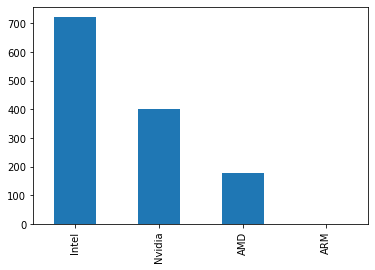

In [78]:
df['Gpu Brand'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Gpu Brand', ylabel='Price'>

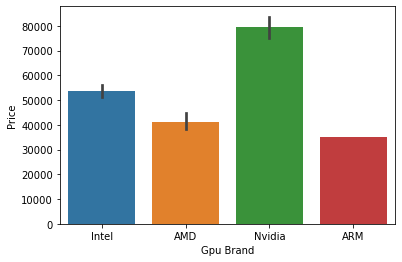

In [79]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'] )

In [80]:
# remove 'ARM ' row it is not worth it
df = df[df['Gpu Brand']!='ARM']

In [81]:
df.drop(columns=['Gpu'],inplace=True)

In [82]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

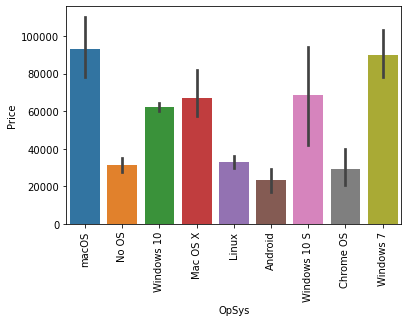

In [83]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

In [84]:
# reduce the number of columns
def define_os(cat):
    if cat == "Windows 10" or cat=="Windows 7" or cat == "Windows 10 S":
        return "Windows"
    elif cat=="macOS" or cat=='Mac OS X':
        return "Mac"
    else:
        return "Other/No OS/Linux"

In [85]:
df['OS'] = df['OpSys'].apply(define_os)

In [86]:
df['OS'].value_counts()

Windows              1125
Other/No OS/Linux     156
Mac                    21
Name: OS, dtype: int64

In [87]:
df.drop(columns=['OpSys'],inplace=True)

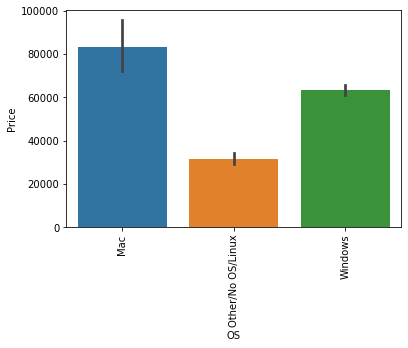

In [88]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\Admin\Umang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

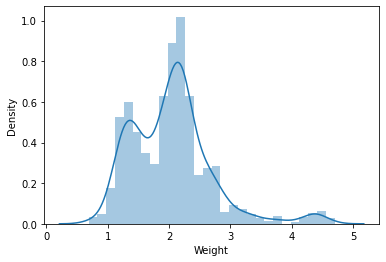

In [89]:
# weight columns
# it was strong relation on sum of the point
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

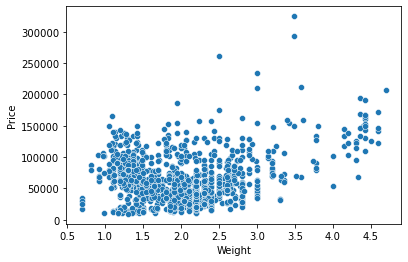

In [90]:
# it has a very lite linear relationship
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [91]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.094106
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

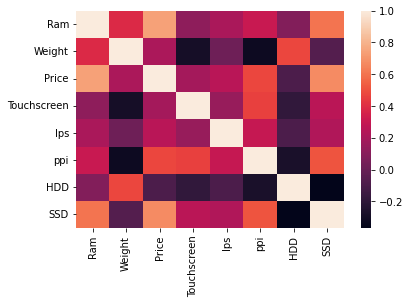

In [92]:
sns.heatmap(df.corr())

C:\Users\Admin\Umang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

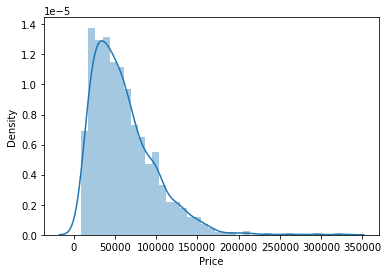

In [93]:
# we can see that we have target column which is right skewd so after apply 
sns.distplot(df['Price'])

In [94]:
# what if we apply box-cox and yeo-jhonson 
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method ='box-cox')

x_price = pt.fit_transform(df['Price'].to_numpy().reshape(-1,1))

C:\Users\Admin\Umang\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

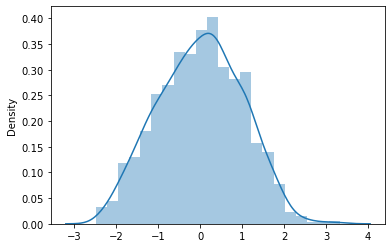

In [95]:
sns.distplot(x_price)

In [96]:
# we can also apply log transformation
y = pd.DataFrame(x_price)

In [97]:
y = np.log(df['Price'])

In [98]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [99]:
X = df.drop(columns=['Price'])

In [100]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Other/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### From here test has started

In [101]:
# so now we have X,y as well. Now perform train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [102]:
# now we have to convert all the categorical columns to the numerical columns so we can train our models
# here we have all nominal categorical data so we are going use OHE

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first")

X_train_new =ohe.fit_transform(X_train[['Company','TypeName','Cpu Brand','Gpu Brand','OS']]).toarray()
X_test_new =ohe.fit_transform(X_test[['Company','TypeName','Cpu Brand','Gpu Brand','OS']]).toarray()

In [103]:
X_train_new.shape

(1041, 31)

In [104]:
df['OS'].value_counts()

Windows              1125
Other/No OS/Linux     156
Mac                    21
Name: OS, dtype: int64

In [105]:
X_train_new1 = np.hstack((X_train[['Ram','Weight','Touchscreen','Ips','ppi','HDD','SSD']].values,X_train_new))

In [106]:
X_train_new1.shape

(1041, 38)

In [107]:
df3 = pd.DataFrame(X_train_new1)

df3

In [108]:
df3

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,8.0,2.20,0.0,0.0,141.211998,1000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,8.0,2.50,0.0,1.0,141.211998,1000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,16.0,4.42,0.0,1.0,127.335675,1000.0,256.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4.0,2.04,0.0,0.0,141.211998,500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8.0,2.04,0.0,0.0,100.454670,2000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,4.0,2.20,0.0,0.0,100.454670,500.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1037,16.0,1.63,0.0,0.0,141.211998,0.0,512.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1038,8.0,2.20,0.0,0.0,100.454670,1000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1039,8.0,2.20,0.0,0.0,100.454670,2000.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


###  From here the actual pipeline is going to start

In [109]:
# import for pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# import for matrix
from sklearn.metrics import r2_score,mean_absolute_error


In [110]:
# import all algorithams
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Linear Regression

In [111]:
# create pipeline and columtransformer

from sklearn import set_config

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)


y_pred = pipe.predict(X_test)

print('R2 Score -',r2_score(y_test,y_pred))
print('MAE -',mean_absolute_error(y_test,y_pred))

set_config(display='diagram')
pipe

R2 Score - 0.8002900196837185
MAE - 0.20441224420943246


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2', LinearRegression())])

In [112]:
np.exp(0.328236628)

1.388517495536914

In [113]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first', sparse=False),
                                 [0, 1, 7, 10, 11])])

### Logistic Regression

In [114]:
# here we can not able to use LogisticRegression because the target column does not containsthe binary value.

### SVM

In [115]:
# SVM works on non-linear data also

In [116]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)


y_pred = pipe.predict(X_test)

print('R2 Score -',r2_score(y_test,y_pred))
print('MAE -',mean_absolute_error(y_test,y_pred))


R2 Score - 0.783069620132929
MAE - 0.20309339916915692


In [117]:
np.exp( 0.45615)

1.5779870250687718

### KNN 

In [118]:
step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)


y_pred = pipe.predict(X_test)

print('R2 Score -',r2_score(y_test,y_pred))
print('MAE -',mean_absolute_error(y_test,y_pred))


R2 Score - 0.7903138560974095
MAE - 0.20199964156146163


###  Decision Tree
Lets try with Hyperparameter Tuning using GridSearhCV as well

In [119]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['mse','mae'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]              
}

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# step2 = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


pipe.fit(X_train,y_train)
# print(step2.best_score_)

y_pred = pipe.predict(X_test)

print('R2 Score -',r2_score(y_test,y_pred))
print('MAE -',mean_absolute_error(y_test,y_pred))


R2 Score - 0.8062561746746524
MAE - 0.1978151385988938


### Random Forest

In [120]:

step1=ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.50,
                              max_features=0.75,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


pipe.fit(X_train,y_train)
# print(step2.best_score_)

y_pred = pipe.predict(X_test)

print('R2 Score -',r2_score(y_test,y_pred))
print('MAE -',mean_absolute_error(y_test,y_pred))


R2 Score - 0.8659524020923084
MAE - 0.16534391581739144


### AddaBoost

In [121]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7852773681818224
MAE 0.2253707262623307


### Grandient Boosting

In [122]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8645422087909728
MAE 0.16252384164886727


### XgBoost

In [123]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8604272065621432
MAE 0.16454434681639316


### Voting Regressor

In [124]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)


step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.873507119300922
MAE 0.16248308578673268


### Exporting Model

In [125]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [126]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu Brand,HDD,SSD,Gpu Brand,OS
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Other/No OS/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Other/No OS/Linux
